In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [65]:
# Try using a different encoding, such as 'ISO-8859-1'
df = pd.read_csv('TMDB_movie_dataset_v11.csv', encoding='ISO-8859-1')

# Your subsequent code
horror_movies = df[df['genres'].str.contains('Horror', na=False)]
scifi_movies = df[df['genres'].str.contains('Science Fiction', na=False)]
action_movies = df[df['genres'].str.contains('Action', na=False)]
comedy_movies = df[df['genres'].str.contains('Comedy', na=False)]
romance_movies = df[df['genres'].str.contains('Romance', na=False)]

In [66]:
print(scifi_movies, action_movies, comedy_movies, romance_movies)


            id                   title  vote_average  vote_count    status  \
0        27205               Inception         8.364       34495  Released   
1       157336            Interstellar         8.417       32571  Released   
3        19995                  Avatar         7.573       29815  Released   
4        24428            The Avengers         7.710       29166  Released   
6       299536  Avengers: Infinity War         8.255       27713  Released   
...        ...                     ...           ...         ...       ...   
954966  699358          Hunting Season         0.000           0   Planned   
955038  699263                   Grasa         0.000           0  Released   
955080  298590              In a State         0.000           0  Released   
955084  699298                Benefits         0.000           0  Released   
955087  699294    Los Superbonaerenses         0.000           0  Released   

       release_date     revenue  runtime  adult  \
0         20

In [67]:
print(scifi_movies, action_movies, comedy_movies, romance_movies)

            id                   title  vote_average  vote_count    status  \
0        27205               Inception         8.364       34495  Released   
1       157336            Interstellar         8.417       32571  Released   
3        19995                  Avatar         7.573       29815  Released   
4        24428            The Avengers         7.710       29166  Released   
6       299536  Avengers: Infinity War         8.255       27713  Released   
...        ...                     ...           ...         ...       ...   
954966  699358          Hunting Season         0.000           0   Planned   
955038  699263                   Grasa         0.000           0  Released   
955080  298590              In a State         0.000           0  Released   
955084  699298                Benefits         0.000           0  Released   
955087  699294    Los Superbonaerenses         0.000           0  Released   

       release_date     revenue  runtime  adult  \
0         20

In [68]:
selected_columns = ['id', 'title', 'release_date','genres']
new_df = df[selected_columns]

new_df.to_csv('path_to_new_file.csv', index=False)
new_df

,id,title,release_date,genres
0,27205,Inception,2010/7/15,"Action, Science Fiction, Adventure"
1,157336,Interstellar,2014/11/5,"Adventure, Drama, Science Fiction"
2,155,The Dark Knight,2008/7/16,"Drama, Action, Crime, Thriller"
3,19995,Avatar,2009/12/15,"Action, Adventure, Fantasy, Science Fiction"
4,24428,The Avengers,2012/4/25,"Science Fiction, Action, Adventure"
...,...,...,...,...
955099,699290,Beer Fiction,2020/5/4,Drama
955100,699291,Rewind,2017/12/31,NaN
955101,699292,Nublu,2017/2/22,Documentary
955102,298597,The Revenge of Baccarat,1948/4/23,NaN


In [69]:
new_df['release_date'] = pd.to_datetime(new_df['release_date'])
new_df['release_year'] = new_df['release_date'].dt.year
new_df

C:\Users\zph11\AppData\Local\Temp\ipykernel_29832\2052858593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['release_date'] = pd.to_datetime(new_df['release_date'])
C:\Users\zph11\AppData\Local\Temp\ipykernel_29832\2052858593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['release_year'] = new_df['release_date'].dt.year


,id,title,release_date,genres,release_year
0,27205,Inception,2010-07-15,"Action, Science Fiction, Adventure",2010.0
1,157336,Interstellar,2014-11-05,"Adventure, Drama, Science Fiction",2014.0
2,155,The Dark Knight,2008-07-16,"Drama, Action, Crime, Thriller",2008.0
3,19995,Avatar,2009-12-15,"Action, Adventure, Fantasy, Science Fiction",2009.0
4,24428,The Avengers,2012-04-25,"Science Fiction, Action, Adventure",2012.0
...,...,...,...,...,...
955099,699290,Beer Fiction,2020-05-04,Drama,2020.0
955100,699291,Rewind,2017-12-31,NaN,2017.0
955101,699292,Nublu,2017-02-22,Documentary,2017.0
955102,298597,The Revenge of Baccarat,1948-04-23,NaN,1948.0


In [70]:
import numpy as np
new_df['release_year'] = new_df['release_year'].fillna(-1)

# Convert to int (this will also convert the NaN placeholders to int)
new_df['release_year'] = new_df['release_year'].astype(int)

new_df

C:\Users\zph11\AppData\Local\Temp\ipykernel_29832\3774993466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['release_year'] = new_df['release_year'].fillna(-1)
C:\Users\zph11\AppData\Local\Temp\ipykernel_29832\3774993466.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['release_year'] = new_df['release_year'].astype(int)


,id,title,release_date,genres,release_year
0,27205,Inception,2010-07-15,"Action, Science Fiction, Adventure",2010
1,157336,Interstellar,2014-11-05,"Adventure, Drama, Science Fiction",2014
2,155,The Dark Knight,2008-07-16,"Drama, Action, Crime, Thriller",2008
3,19995,Avatar,2009-12-15,"Action, Adventure, Fantasy, Science Fiction",2009
4,24428,The Avengers,2012-04-25,"Science Fiction, Action, Adventure",2012
...,...,...,...,...,...
955099,699290,Beer Fiction,2020-05-04,Drama,2020
955100,699291,Rewind,2017-12-31,NaN,2017
955101,699292,Nublu,2017-02-22,Documentary,2017
955102,298597,The Revenge of Baccarat,1948-04-23,NaN,1948


In [84]:
# Filter the DataFrame to include only movies from 1980 to 2022
filtered_df = new_df[(new_df['release_year'] >= 1980) & (new_df['release_year'] <= 2022)]

horror_movies_new = filtered_df[filtered_df['genres'].str.contains('Horror', na=False)]

grouped_horror=horror_movies_new.groupby('release_year')
# Group by the release year
grouped_df = filtered_df.groupby('release_year')

# Example of an aggregation: counting the number of movies per year
movies_per_year = grouped_df.size()
horror_per_year=grouped_horror.size()

# Displaying the result
print(movies_per_year)
print('-----------horror-------------')
print(horror_per_year)
movies_per_year_df = movies_per_year.to_frame(name='movies_per_year')

release_year
1980     5098
1981     4976
1982     5267
1983     5342
1984     5592
1985     5696
1986     5842
1987     6024
1988     6158
1989     6580
1990     6488
1991     6419
1992     6518
1993     6457
1994     6524
1995     6830
1996     6682
1997     7128
1998     7280
1999     7800
2000     8182
2001     9162
2002    10274
2003    11588
2004    12914
2005    14324
2006    16042
2007    16605
2008    17478
2009    18483
2010    19142
2011    20759
2012    22667
2013    24987
2014    26983
2015    28433
2016    29858
2017    33211
2018    35424
2019    39343
2020    38446
2021    40993
2022    40556
dtype: int64
-----------horror-------------
release_year
1980     209
1981     247
1982     232
1983     195
1984     179
1985     241
1986     246
1987     354
1988     437
1989     438
1990     368
1991     317
1992     293
1993     267
1994     241
1995     270
1996     285
1997     268
1998     295
1999     345
2000     379
2001     375
2002     446
2003     490
2004     608
200

In [85]:
movies_per_year_df.describe()

,movies_per_year
count,43.000000
mean,15361.744186
std,11605.063511
min,4976.000000
25%,6472.500000
50%,9162.000000
75%,21713.000000
max,40993.000000


In [73]:
# Calculate the ratio of horror movies per year
horror_ratio_per_year = (horror_per_year / movies_per_year)*100

# Displaying the result
print('Ratio of Horror Movies Per Year:')
print(horror_ratio_per_year)

Ratio of Horror Movies Per Year:
release_year
1980    4.099647
1981    4.963826
1982    4.404785
1983    3.650318
1984    3.201001
1985    4.231039
1986    4.210887
1987    5.876494
1988    7.096460
1989    6.656535
1990    5.672010
1991    4.938464
1992    4.495244
1993    4.135047
1994    3.694053
1995    3.953148
1996    4.265190
1997    3.759820
1998    4.052198
1999    4.423077
2000    4.632119
2001    4.092993
2002    4.341055
2003    4.228512
2004    4.708069
2005    4.621614
2006    4.993143
2007    5.046673
2008    4.863257
2009    4.977547
2010    4.915892
2011    5.115853
2012    5.236688
2013    5.214712
2014    5.755476
2015    5.806633
2016    5.743854
2017    5.922736
2018    5.778568
2019    5.632514
2020    6.315351
2021    5.871734
2022    6.746227
dtype: float64


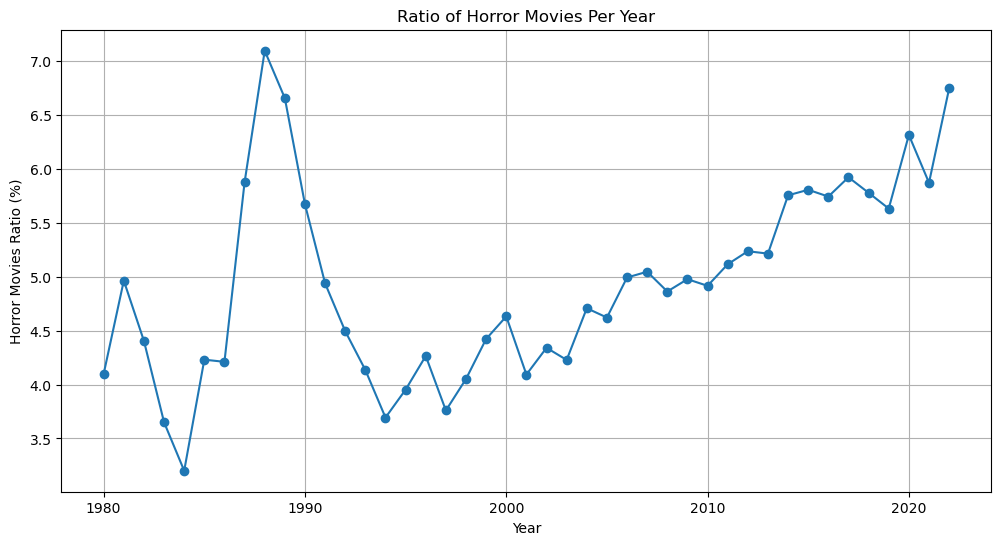

In [74]:
import matplotlib.pyplot as plt

# Assuming horror_ratio_per_year is already calculated

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(horror_ratio_per_year, marker='o')  # 'o' adds markers to each data point

# Adding title and labels
plt.title('Ratio of Horror Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Horror Movies Ratio (%)')

# Optionally, you can add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()


In [75]:
df_economy=pd.read_csv('Economy of the United States.csv')
df_economy

,Unnamed: 0,Year,GDP (in Bil. US$PPP),GDP per capita (in US$ PPP),GDP (in Bil. US$nominal),GDP per capita (in US$ nominal),GDP growth (real),Inflation rate (in Percent),Unemployment (in Percent),Government debt (in?% of GDP)
0,0,1980,2857.3,12552.9,2857.3,12552.9,-0.30%,13.50%,7.20%,NaN
1,1,1981,3207.0,13948.7,3207.0,13948.7,2.50%,10.40%,7.60%,NaN
2,2,1982,3343.8,14405.0,3343.8,14405.0,-1.80%,6.20%,9.70%,NaN
3,3,1983,3634.0,15513.7,3634.0,15513.7,4.60%,3.20%,9.60%,NaN
4,4,1984,4037.7,17086.4,4037.7,17086.4,7.20%,4.40%,7.50%,NaN
5,5,1985,4339.0,18199.3,4339.0,18199.3,4.20%,3.50%,7.20%,NaN
6,6,1986,4579.6,19034.8,4579.6,19034.8,3.50%,1.90%,7.00%,NaN
7,7,1987,4855.3,20001.0,4855.3,20001.0,3.50%,3.60%,6.20%,NaN
8,8,1988,5236.4,21376.0,5236.4,21376.0,4.20%,4.10%,5.50%,NaN
9,9,1989,5641.6,22814.1,5641.6,22814.1,3.70%,4.80%,5.30%,NaN


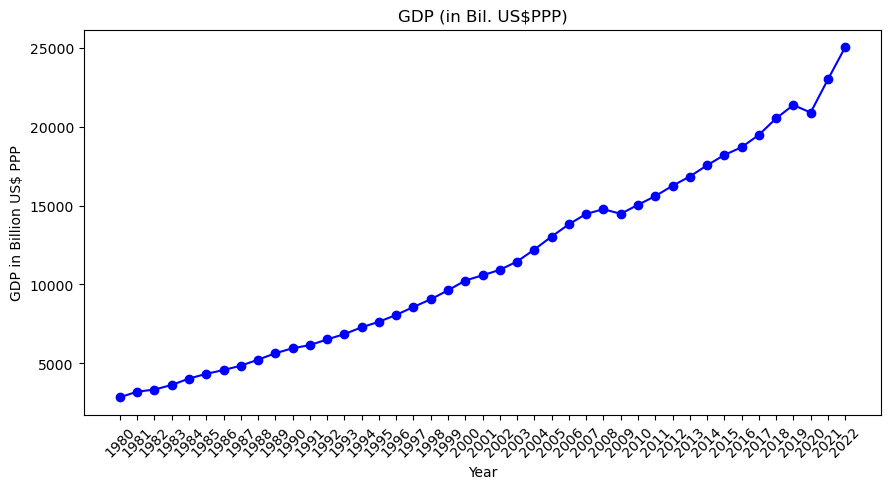

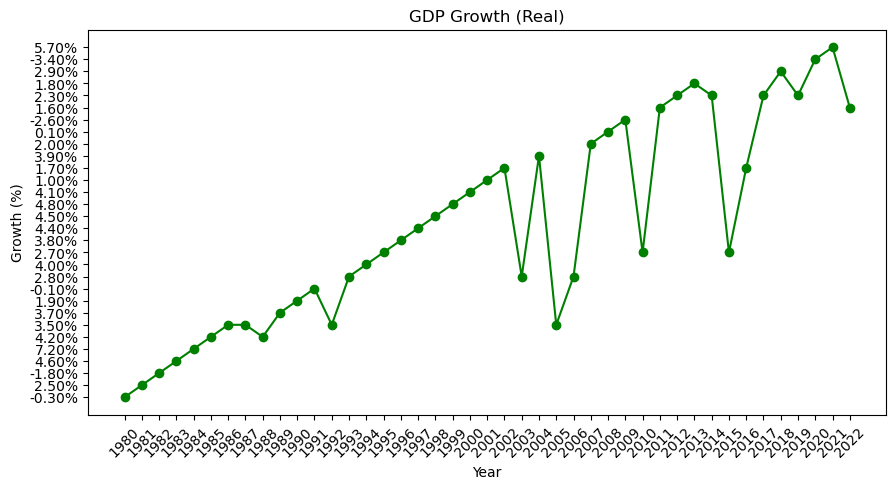

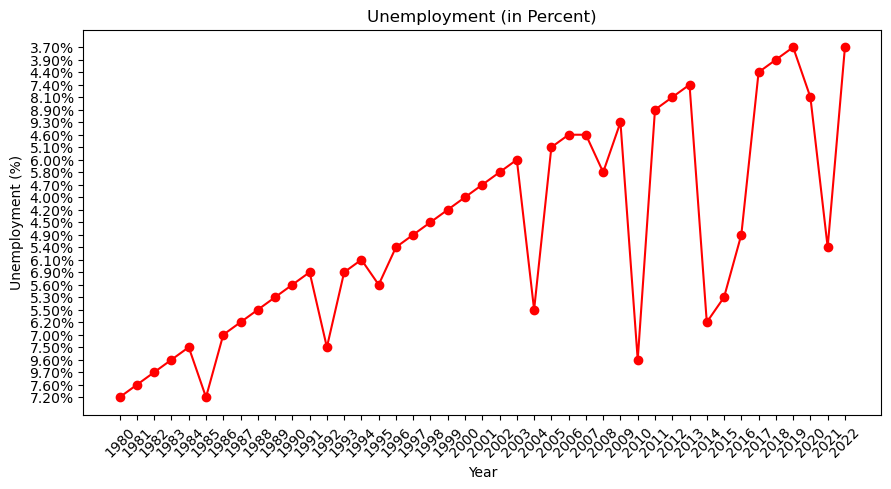

In [76]:
df_filtered = df_economy[(df_economy['Year'] >= 1980) & (df_economy['Year'] <= 2022)]

# Plotting
plt.figure(figsize=(35, 5))

# GDP (in Bil. US$PPP)
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
plt.plot(df_filtered['Year'], df_filtered['GDP (in Bil. US$PPP)'], marker='o', color='b')
plt.title('GDP (in Bil. US$PPP)')
plt.xlabel('Year')
plt.ylabel('GDP in Billion US$ PPP')
plt.xticks(df_filtered['Year'], rotation=45)
plt.show()

plt.figure(figsize=(35, 5))
# GDP growth (real)
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
plt.plot(df_filtered['Year'], df_filtered['GDP growth (real)'], marker='o', color='g')
plt.title('GDP Growth (Real)')
plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.xticks(df_filtered['Year'], rotation=45)
plt.show()

plt.figure(figsize=(35, 5))
# Unemployment (in Percent)
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
plt.plot(df_filtered['Year'], df_filtered['Unemployment (in Percent)'], marker='o', color='r')
plt.title('Unemployment (in Percent)')
plt.xlabel('Year')
plt.ylabel('Unemployment (%)')
plt.xticks(df_filtered['Year'], rotation=45)
plt.show()

In [77]:
data = pd.read_csv('growth.csv')

In [78]:
data

,Year,GDP growth,horror,percent
0,1980,-0.30%,4.10,4.10%
1,1981,2.50%,4.96,4.96%
2,1982,-1.80%,4.40,4.40%
3,1983,4.60%,3.65,3.65%
4,1984,7.20%,3.20,3.20%
5,1985,4.20%,4.23,4.23%
6,1986,3.50%,4.21,4.21%
7,1987,3.50%,5.88,5.88%
8,1988,4.20%,7.10,7.10%
9,1989,3.70%,6.66,6.66%


In [79]:
# Calculating the correlation between GDP growth and horror movie production percentage
correlation = data['GDP growth'].corr(data['percent'])

# Plotting the relationship between GDP growth and horror movie production percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP growth', y='percent', data=data)
plt.title('Correlation between GDP Growth and Horror Movie Production Percentage')
plt.xlabel('GDP Growth (%)')
plt.ylabel('Horror Movie Production Percentage (%)')
plt.show()

correlation

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
data['log_GDP'] = np.log(data['GDP growth'] + 1) 
data['log_percent'] = np.log(data['percent'] + 1)

In [ ]:
data

In [ ]:
# Calculating the correlation between GDP growth and horror movie production percentage
correlation = data['log_GDP'].corr(data['log_percent'])

# Plotting the relationship between GDP growth and horror movie production percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_GDP', y='log_percent', data=data)
plt.title('Correlation between GDP Growth and Horror Movie Production Percentage')
plt.xlabel('GDP Growth ')
plt.ylabel('Horror Movie Production Percentage ')
plt.show()

correlation

In [ ]:
data['sqrt_GDP'] = np.sqrt(data['GDP growth'])
data['sqrt_percent'] = np.sqrt(data['percent'])

In [ ]:
data

In [ ]:
positive_data = data['GDP growth'] + abs(data['GDP growth'].min()) + 1

# Apply the Box-Cox transformation
transformed_data, best_lambda = stats.boxcox(positive_data)

# You can then add the transformed data back into your DataFrame
data['boxcox_transformed_GDP'] = transformed_data

positive_data = data['percent'] + abs(data['percent'].min()) + 1

# Apply the Box-Cox transformation
transformed_data, best_lambda = stats.boxcox(positive_data)

# You can then add the transformed data back into your DataFrame
data['boxcox_transformed_percent'] = transformed_data

In [ ]:
data

In [ ]:
# Calculating the correlation between GDP growth and horror movie production percentage
correlation = data['boxcox_transformed_GDP'].corr(data['boxcox_transformed_percent'])

# Plotting the relationship between GDP growth and horror movie production percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='boxcox_transformed_GDP', y='boxcox_transformed_percent', data=data)
plt.title('Correlation between GDP Growth and Horror Movie Production Percentage')
plt.xlabel('GDP Growth ')
plt.ylabel('Horror Movie Production Percentage ')
plt.show()

correlation

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data['GDP growth'], model='additive', period=12)

In [ ]:
deseasonalized = data['GDP growth'] - decomposition.seasonal
deseasonalized

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(deseasonalized)
plt.title('Deseasonalized Time Series')
plt.xlabel('Time')
plt.ylabel('Deseasonalized Values')
plt.show()

In [ ]:
data['deseasonalized'] = deseasonalized

# Calculating the correlation between GDP growth and horror movie production percentage
correlation = data['deseasonalized'].corr(data['percent'])

# Plotting the relationship between GDP growth and horror movie production percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='deseasonalized', y='percent', data=data)
plt.title('Correlation between GDP Growth and Horror Movie Production Percentage')
plt.xlabel('GDP Growth ')
plt.ylabel('Horror Movie Production Percentage ')
plt.show()

correlation

In [ ]:
data['GDP_growth_category'] = pd.qcut(data['boxcox_transformed_GDP'], 3, labels=["low", "medium", "high"])
data

In [ ]:
model = ols('percent ~ C(GDP_growth_category)', data=data).fit()

# Perform the ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)

print(anova_results)

In [ ]:
data = data.drop(['sqrt_GDP', 'sqrt_percent'], axis = 1)

In [ ]:
data

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
X = data['boxcox_transformed_GDP']
y = data['boxcox_transformed_percent']
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X).fit()

# Displaying the regression results
regression_results = model.summary()
regression_results

In [ ]:
X = data['GDP growth']
y = data['percent']
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X).fit()

# Displaying the regression results
regression_results = model.summary()
regression_results

In [ ]:
selected_rows = data.iloc[:21]

In [ ]:
selected_rows

In [ ]:
X = selected_rows['GDP growth']
y = selected_rows['percent']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Displaying the regression results
regression_results = model.summary()
regression_results

In [ ]:
describe = data[['GDP growth', 'percent']].describe()
describe